In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/611noorsaeed/Resume-Screening-App/main/UpdatedResumeDataSet.csv')

In [3]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
df.shape

(962, 2)

In [6]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [7]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

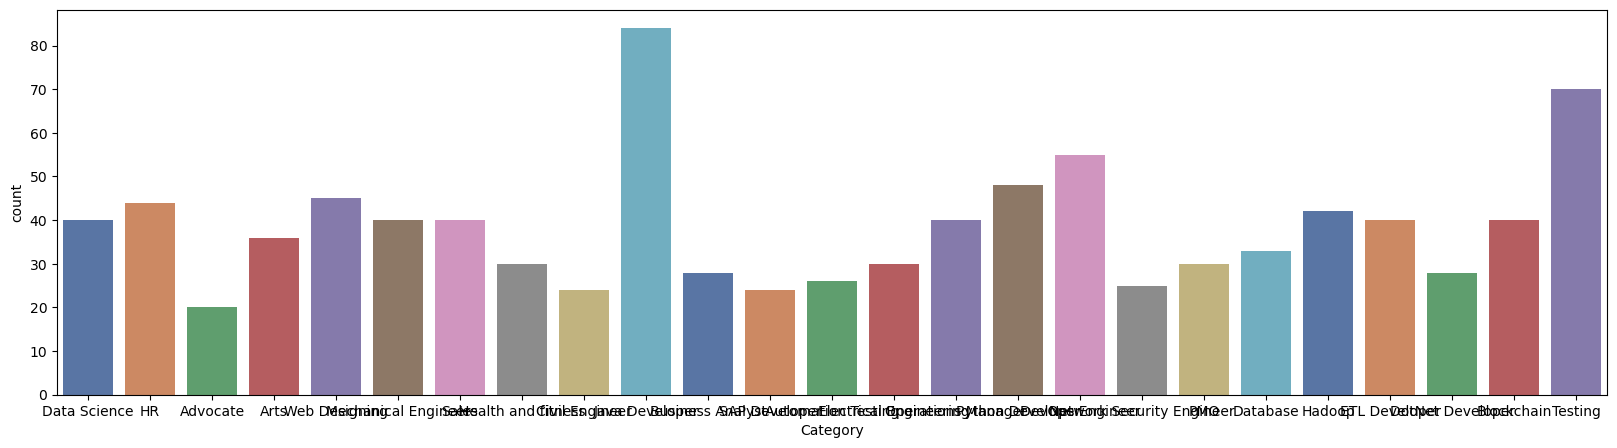

In [8]:
plt.figure(figsize=(20,5))
sns.countplot(x = df['Category'], data = df, palette="deep")
plt.show()

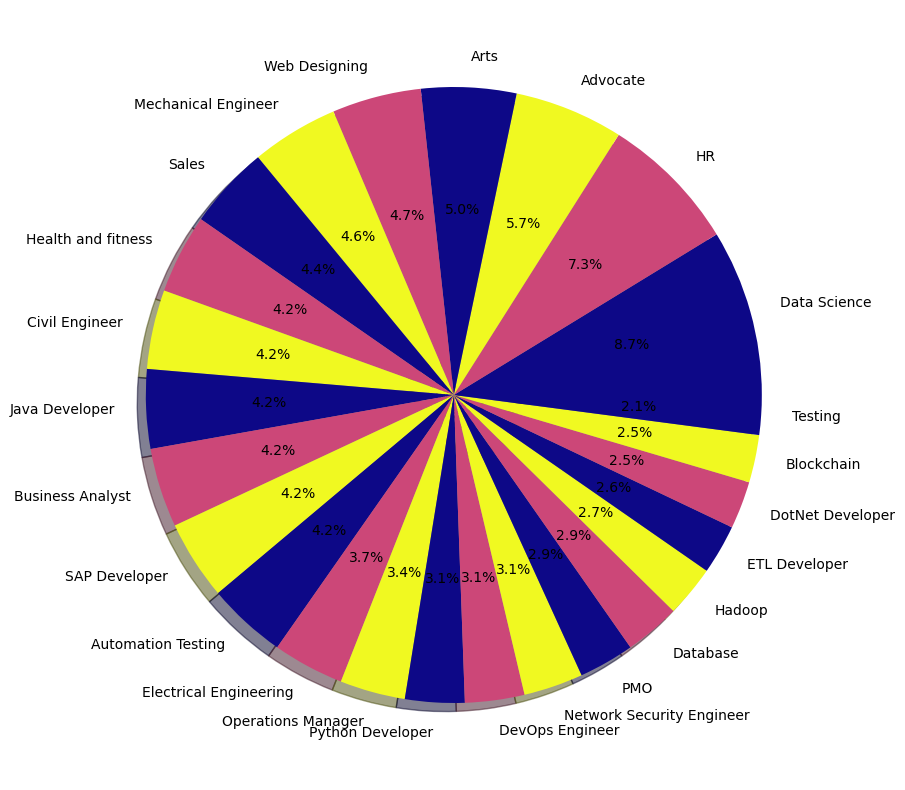

In [9]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [10]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [11]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [12]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

preprocess

<function __main__.preprocess(text)>

In [13]:
df['Resumes'] = df['Resume'].apply(lambda x: preprocess(x))

In [40]:
df['Resumes'][957]

'Computer Skills Proficient MS office Word Basic Excel Power point Strength Hard work Loyalty Creativity Self motivate Responsible Initiative Good people management skill positive attitude knowledge window Internet Education Details Bachelor Electrical Engineering Electrical Engineering Nashik Maharashtra Guru Gobind Singh College Engineering Research Centre Diploma Electrical Engineering Nashik Maharashtra S M E S Polytechnic College Testing Engineer Skill Details EXCEL Exprience 6 month MS office Exprience 6 month WORD Exprience 6 monthscompany Details company description Department Testing responsibility check ACB VCB Circuit Breaker follow test conduct Circuit Breaker draw 1 check breaker timing 2 check contact resistance contact resistance meter CRM 3 check breaker insulation resistance IR 4 check breaker rack rack properly 5 check closing tripping operation work properly check follow test conduct MCC PCC panel 1 Insulation Resistance IR test 2 Contact Resistance CRM test 3 check 

In [14]:
df['Resumes'][0]

'Skills Programming Languages Python panda numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learn regression SVM Na ve Bayes KNN Random Forest Decision tree boost technique Cluster Analysis Word embed Sentiment Analysis Natural Language processing dimensionality reduction topic model LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js plotly kibana matplotlib ggplot Tableau Regular Expression HTML css Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open cv understanding Deep learn Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 month jQuery Exprience 24 month Python Exprience 24 monthscompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assist elerate review process run analytic generate report Core mem

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [17]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# TF-IDF Vectorization

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfd = TfidfVectorizer(stop_words='english')

tfidfd.fit(df['Resume'])
requredTaxt  = tfidfd.transform(df['Resumes'])


# train test splitting

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

# Now let’s train the model and print the classification report

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))


0.9740932642487047


In [35]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 15,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 15,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [36]:
import pickle
pickle.dump(tfidfd,open('tfidfd','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [41]:
myresume = """Computer Skills Proficient MS office Word Basic Excel Power point Strength Hard work Loyalty Creativity Self motivate Responsible Initiative Good people management skill positive attitude knowledge window Internet Education Details Bachelor Electrical Engineering Electrical Engineering Nashik Maharashtra Guru Gobind Singh College Engineering Research Centre Diploma Electrical Engineering Nashik Maharashtra S M E S Polytechnic College Testing Engineer Skill Details EXCEL Exprience 6 month MS office Exprience 6 month WORD Exprience 6 monthscompany Details company description Department Testing responsibility check ACB VCB Circuit Breaker follow test conduct Circuit Breaker draw 1 check breaker timing 2 check contact resistance contact resistance meter CRM 3 check breaker insulation resistance IR 4 check breaker rack rack properly 5 check closing tripping operation work properly check follow test conduct MCC PCC panel 1 Insulation Resistance IR test 2 Contact Resistance CRM test 3 check connection m p panel draw check follow test conduct transformer 1 Insulation Resistance IR test 2 Transformer Ratio test 3 Transformer Vector Group test 4 Magnetic Balance test 5 Magnetic current test 6 check transformer tap remotely manually 7 check alarm tripping protection command work properly circuit diagram check test conduct HV cable 1 hi Pot test 2 Insulation resistance IR test check LV cable megger IR Test check relay connection circuit diagram create defect list arise testing try find solution minimize problem company TRANS POWER solution description Lake Site CO Op Soc Adi Shankaracharya Marg Opp IIT Main Gate Powai 400076
"""

In [42]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidfd.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Testing
23
